In [1]:
from FaceLoader import FaceLoader
from SocialProcessor import SocialProcessor
import cv2
import numpy as np
from matplotlib.pyplot import imshow

%matplotlib inline

In [6]:
url = "https://sun9-4.userapi.com/c622927/v622927244/2de72/1p1Vc_B4Or0.jpg"
processor = FaceLoader(url)

0.9273496
0.55976486


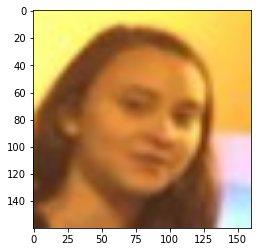

In [8]:
data = processor.load_and_align_image()

imshow(data[1])

In [4]:
processor.local_url

'./tmp/cc3f27f055d33bcdaf9d90bffdfb4cf6.jpg'